# Medical Cost Personal Insurance Project

Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. 
These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. 
The main purpose of medical insurance is to receive the best medical care without any strain on your finances. 
Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary 
expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  
medical insurance is calculated .
    
Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Seperating numerical and categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == object:
        categorical_col.append(i)
print('Categorical Columns: ',categorical_col)

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != object:
        numerical_col.append(i)
print('Numerical Columns: ',numerical_col)

Categorical Columns:  ['sex', 'smoker', 'region']
Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [7]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
df['sex'] = df['sex'].replace({'male':1,'female':0})
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In the sex column, 0 means female and 1 means male

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df['region'] = lab_enc.fit_transform(df['region'])
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In the region column, 3 means southwest, 2 means southeast, 1 means northwest, 0 means northeast

In [13]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values present

In [16]:
df.region.value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [17]:
df.smoker.value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [18]:
df.sex.value_counts()

sex
1    676
0    662
Name: count, dtype: int64

Check distribution

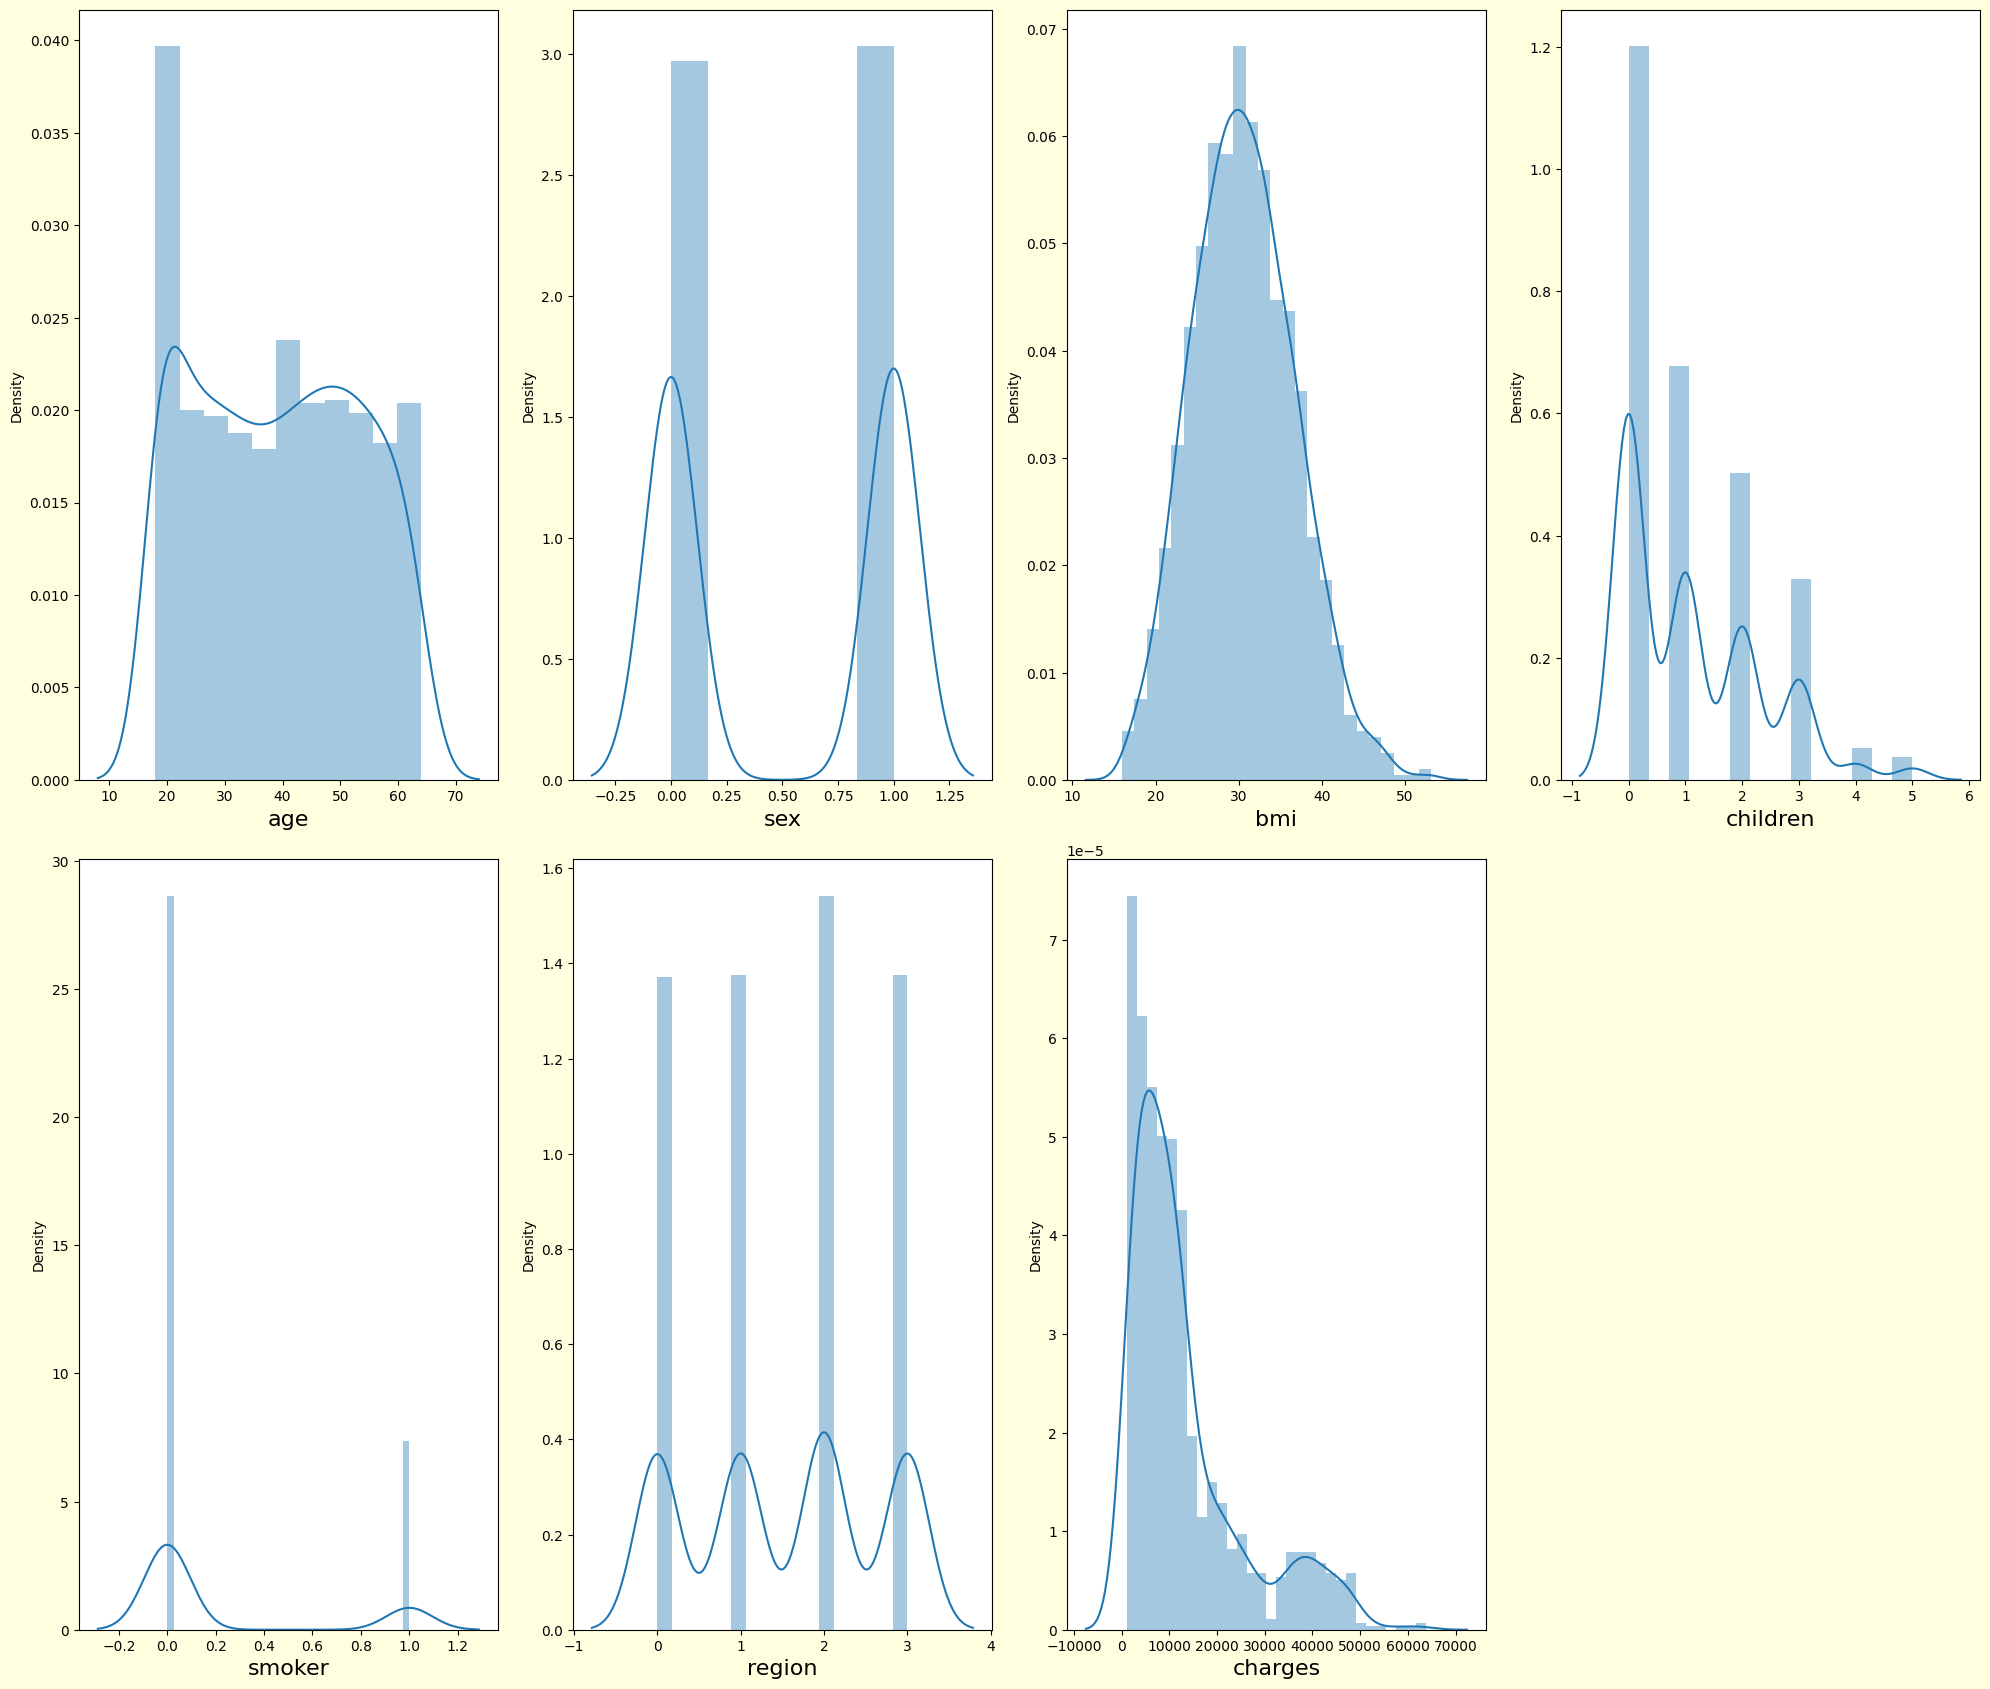

In [19]:
plt.figure(figsize = (20,25),facecolor = 'lightyellow')
plotnumber = 1

for column in df.columns:
    if plotnumber <= 7:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()

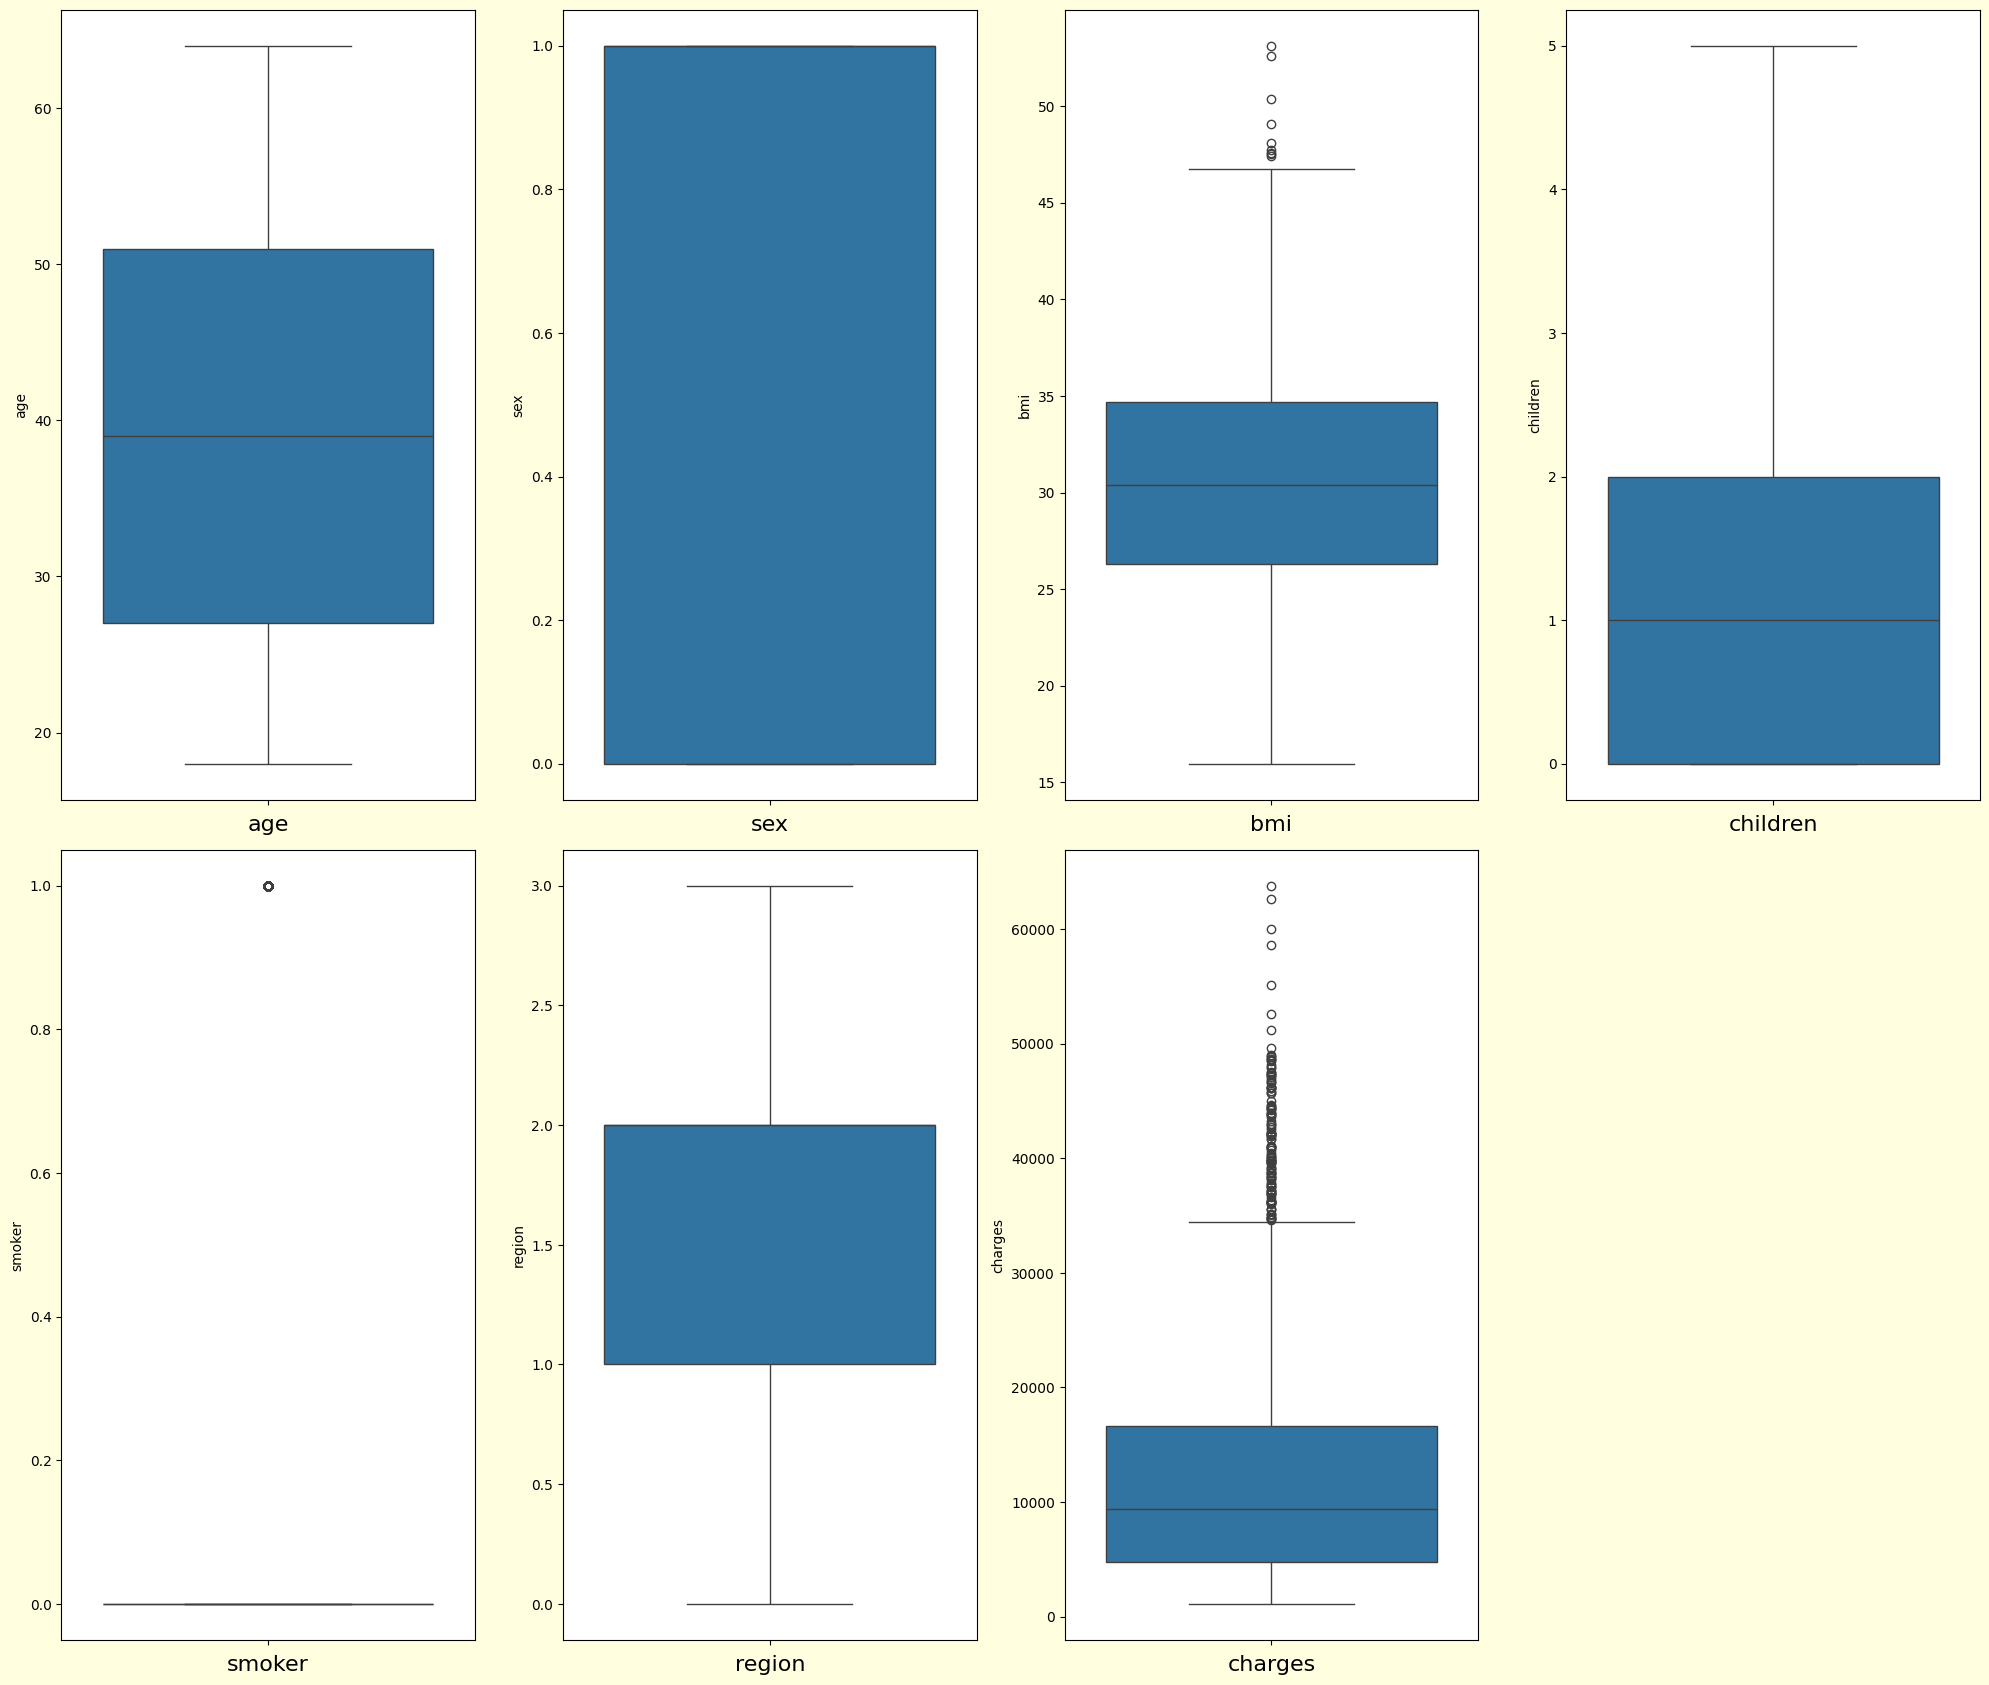

In [20]:
plt.figure(figsize = (20,25),facecolor = 'lightyellow')
plotnumber = 1

for column in df.columns:
    if plotnumber <= 7:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()

In [21]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [22]:
df['bmi'] = np.log(df['bmi'])
df['charges'] = np.log(df['charges'])

In [23]:
df['bmi']

0       3.328627
1       3.519573
2       3.496508
3       3.122585
4       3.363149
          ...   
1333    3.433019
1334    3.463233
1335    3.606856
1336    3.250374
1337    3.369707
Name: bmi, Length: 1338, dtype: float64

In [24]:
df['charges']

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

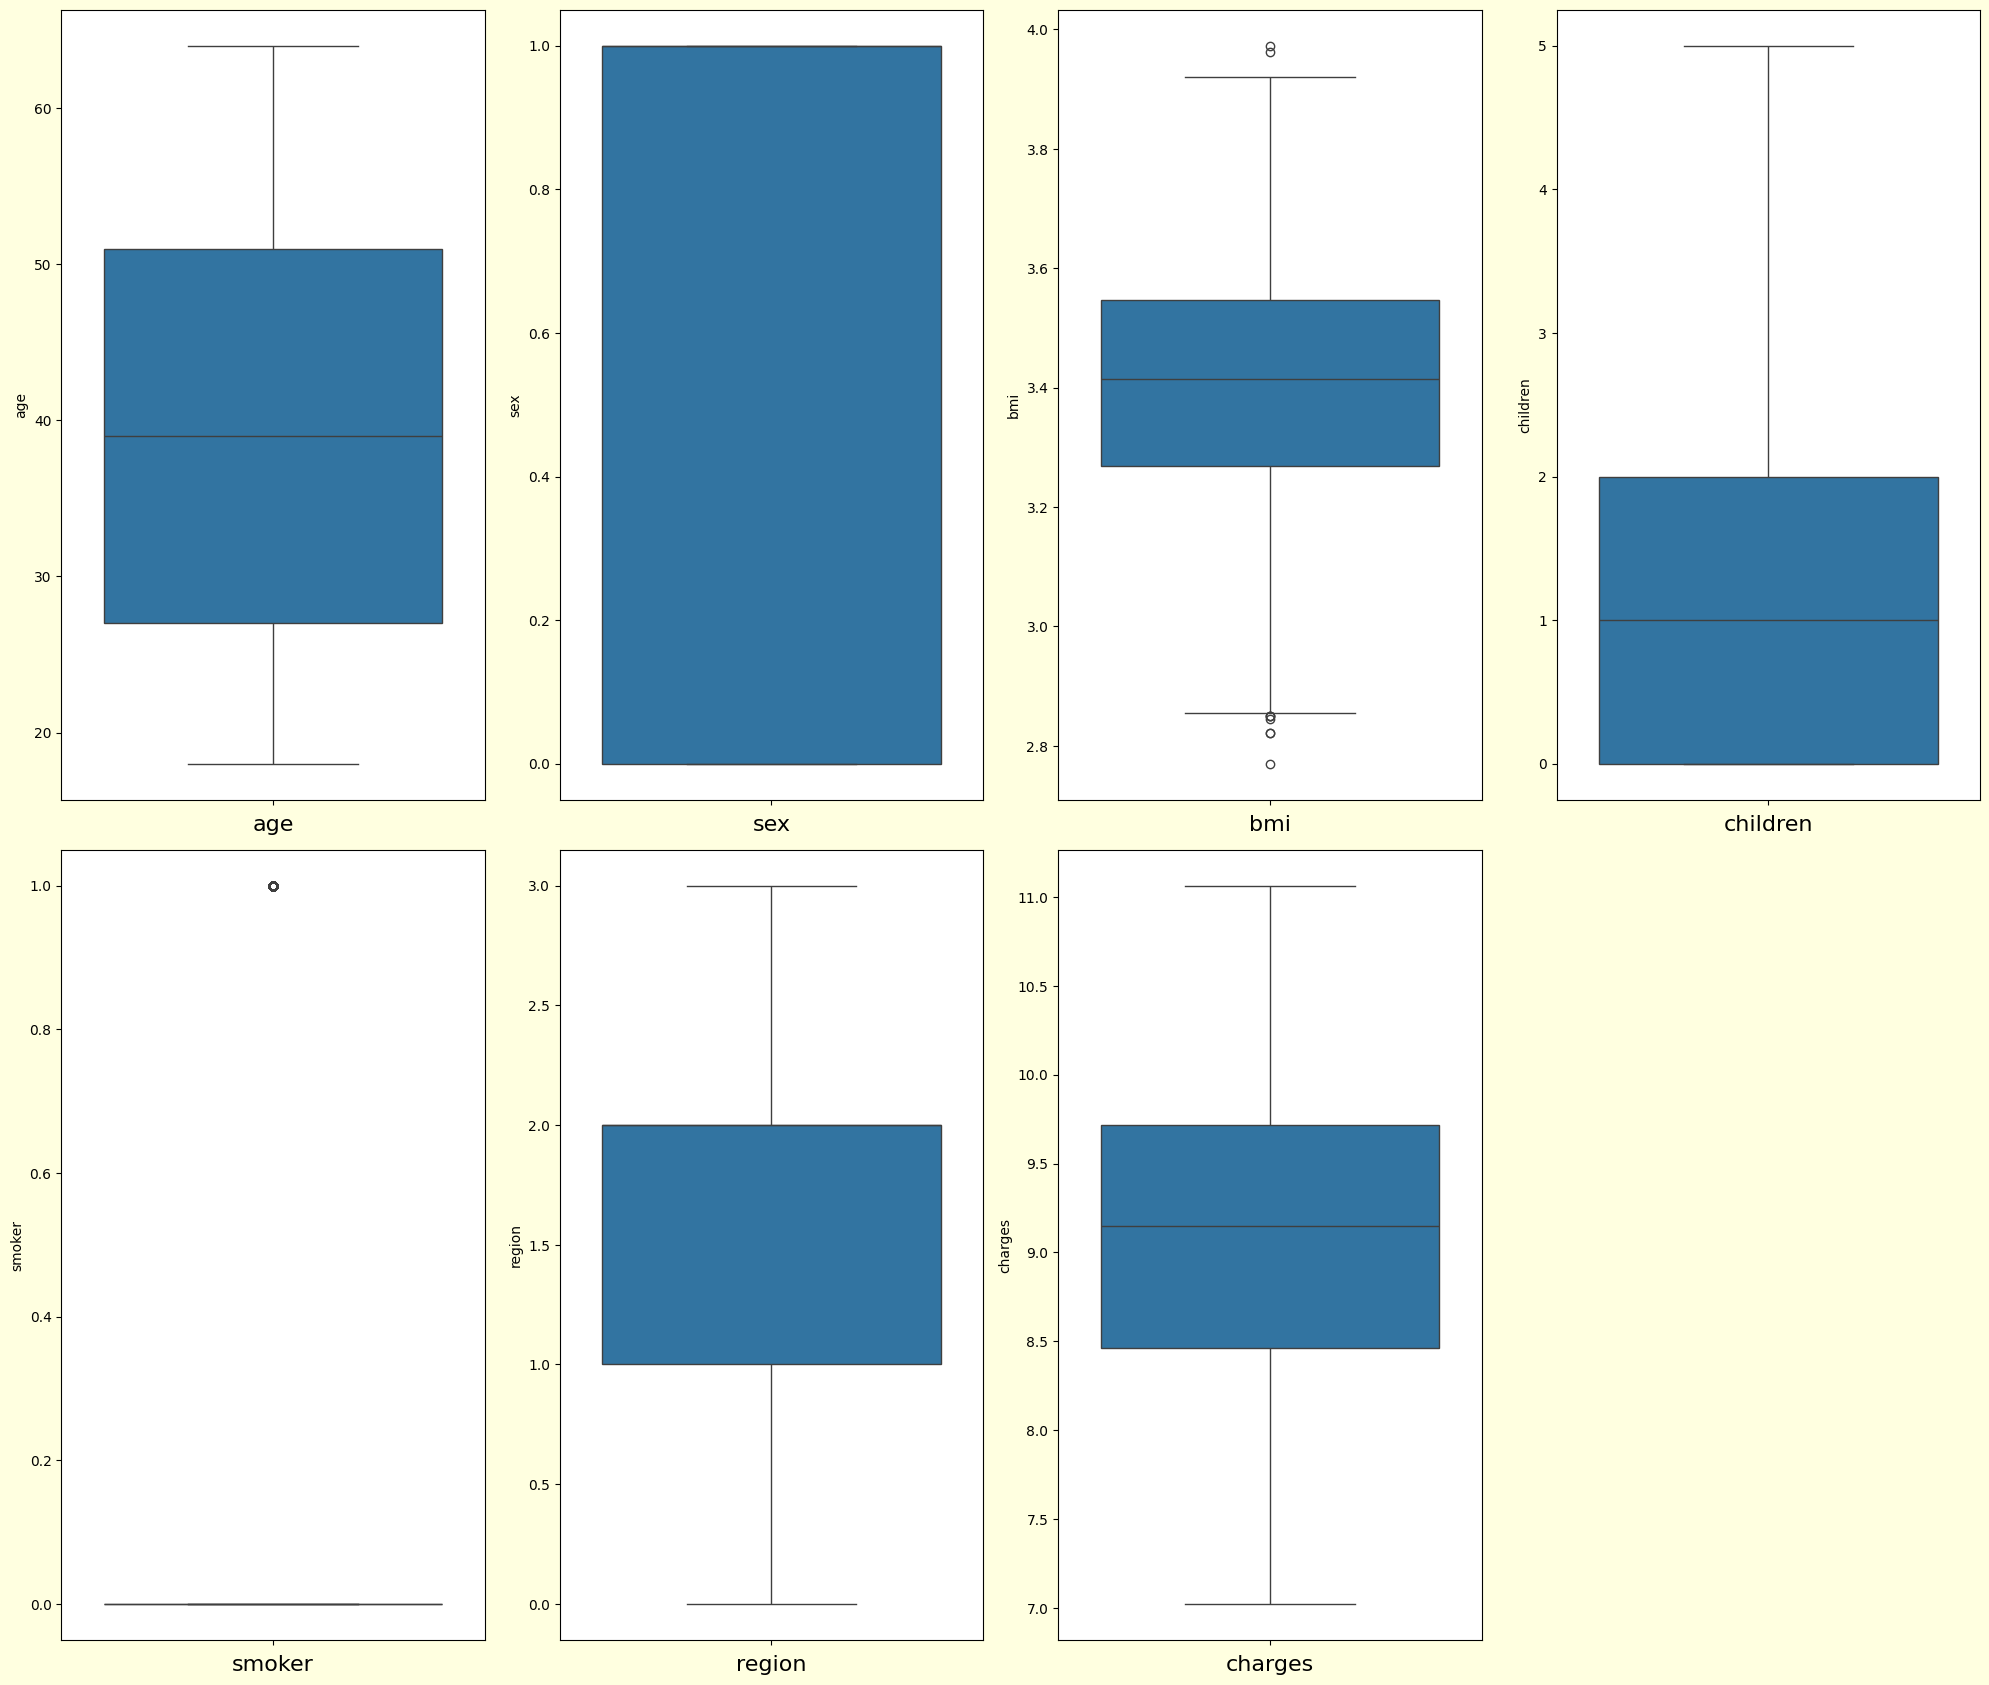

In [25]:
plt.figure(figsize = (20,25),facecolor = 'lightyellow')
plotnumber = 1

for column in df.columns:
    if plotnumber <= 7:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber += 1
plt.tight_layout()

In [26]:
df.skew()

age         0.055673
sex        -0.020951
bmi        -0.256655
children    0.938380
smoker      1.464766
region     -0.038101
charges    -0.090098
dtype: float64

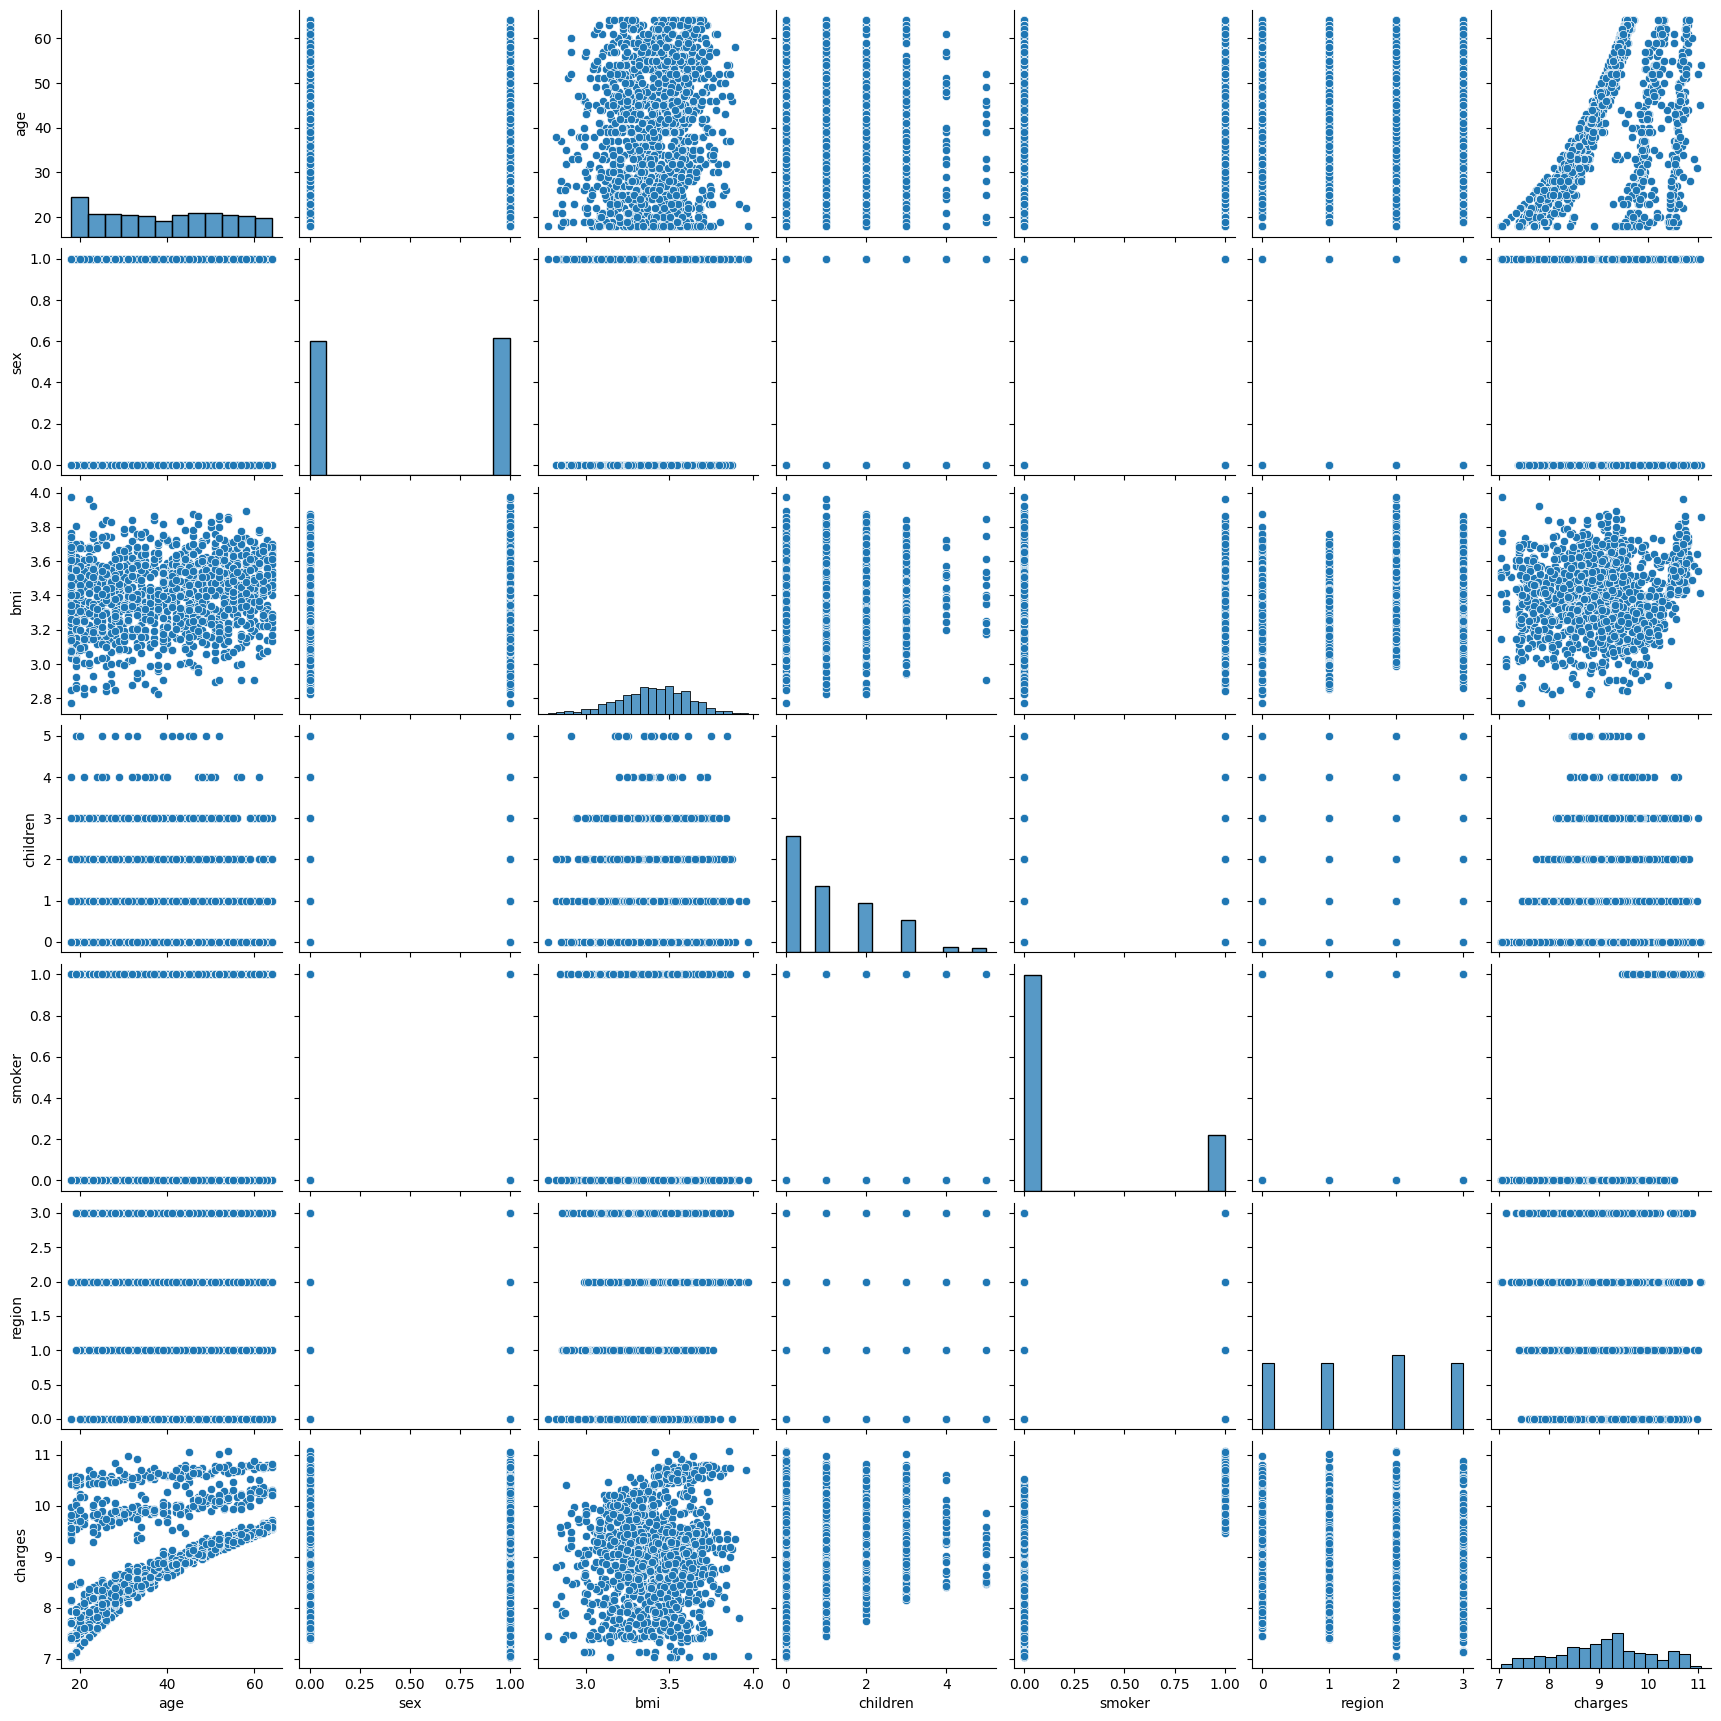

In [27]:
sns.pairplot(df,palette = 'Dark2')
plt.show()

Check Multicollinearity

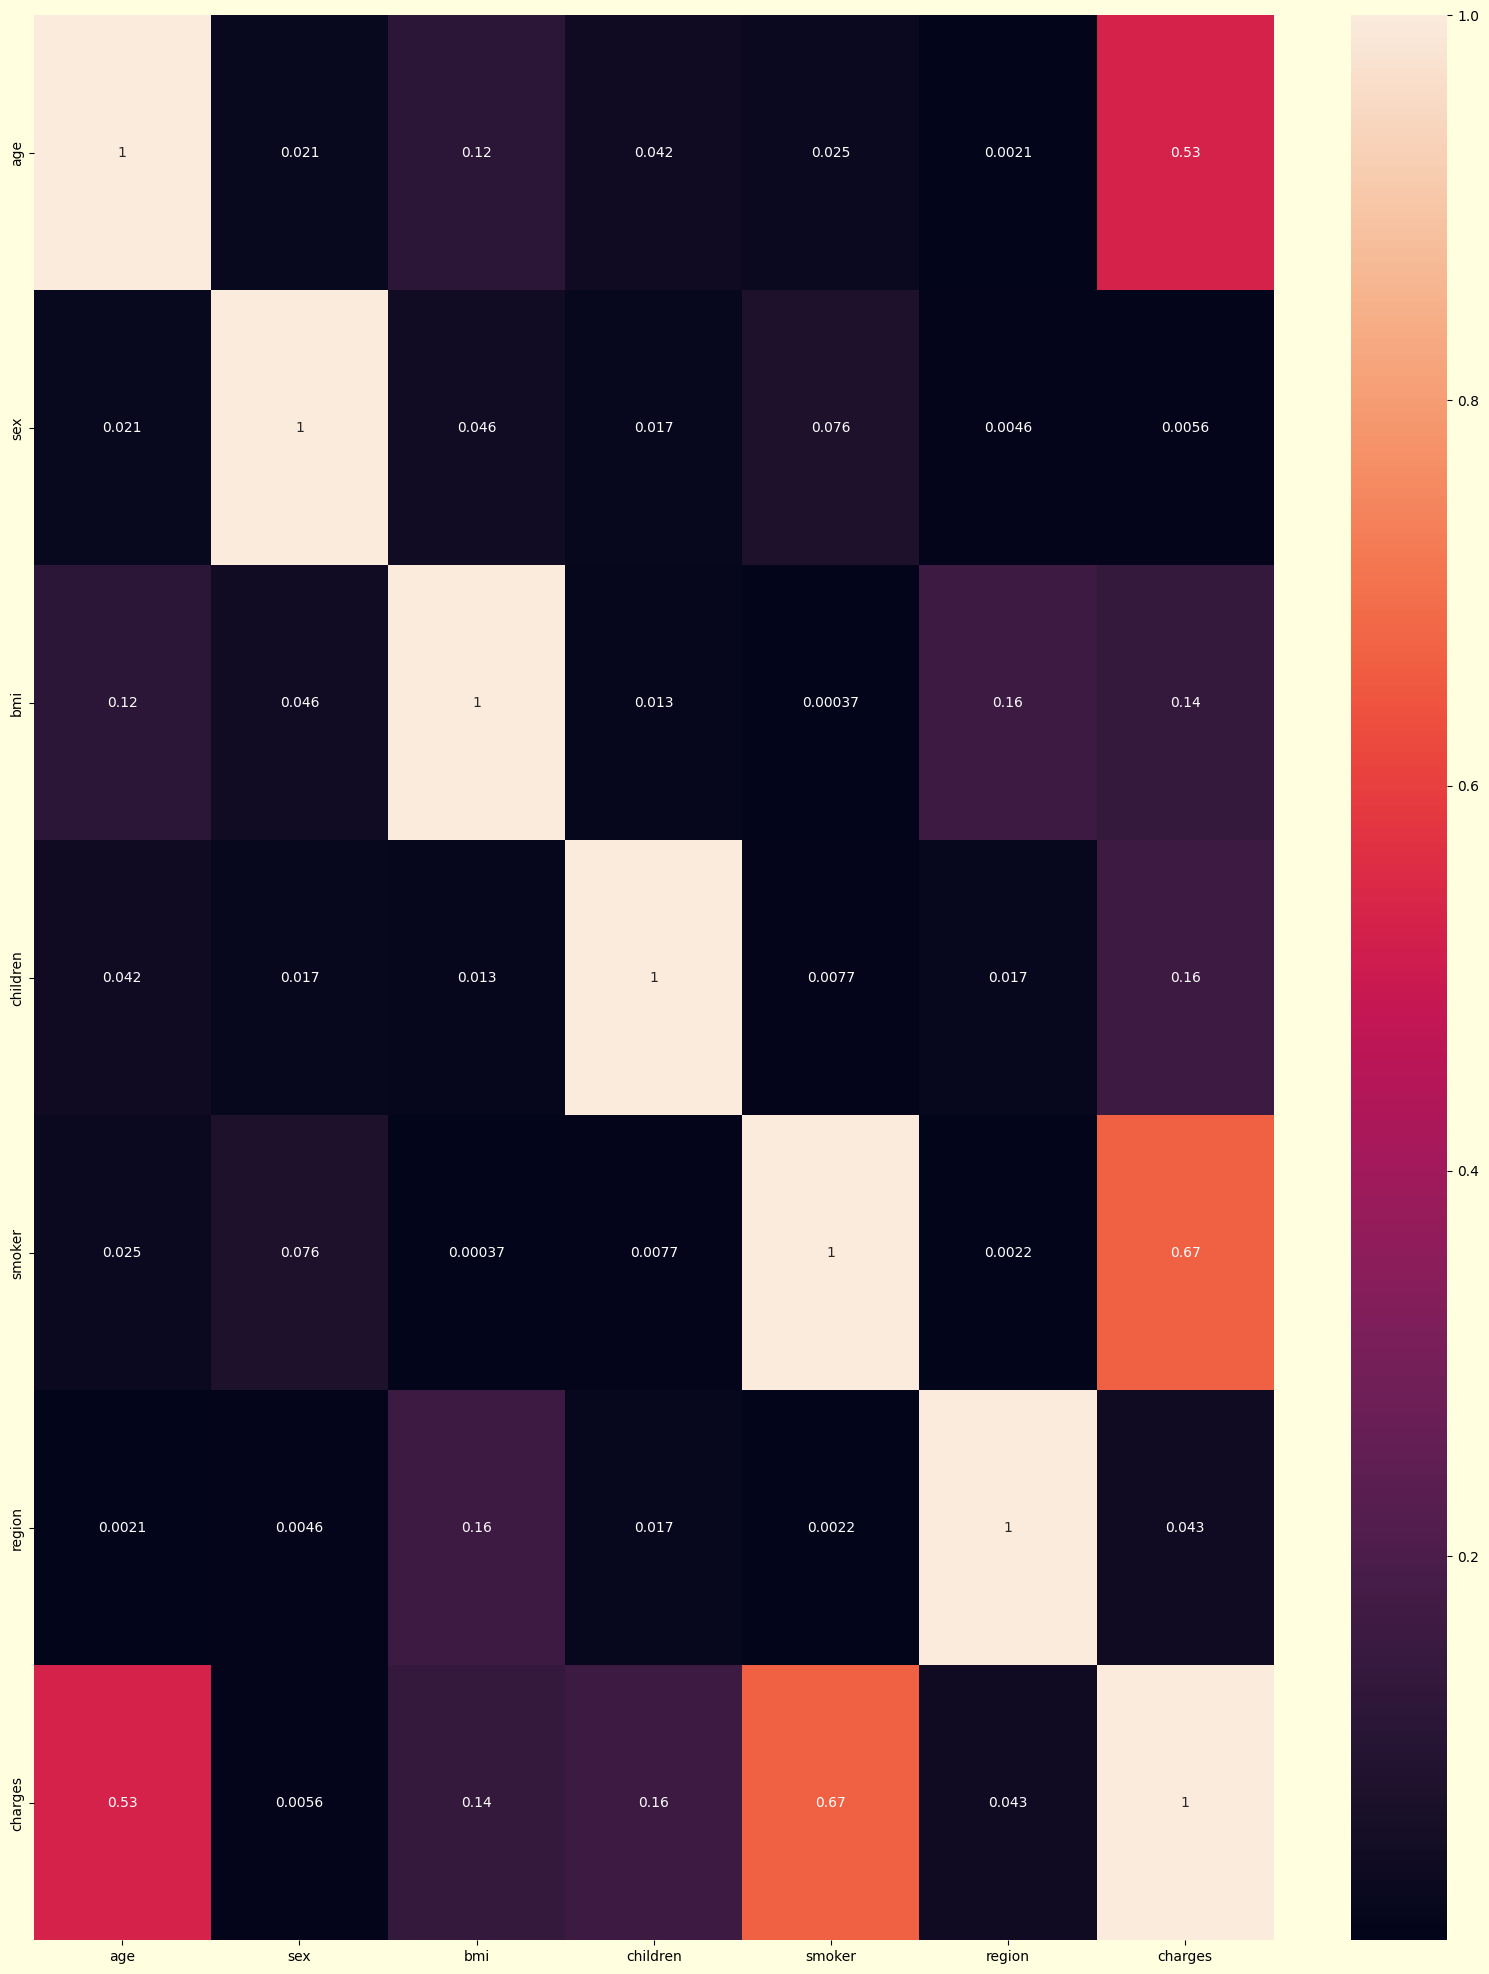

In [28]:
corr = df.corr().abs()

plt.figure(figsize = (20,25),facecolor = 'lightyellow')
sns.heatmap(corr,annot = True)
plt.show()

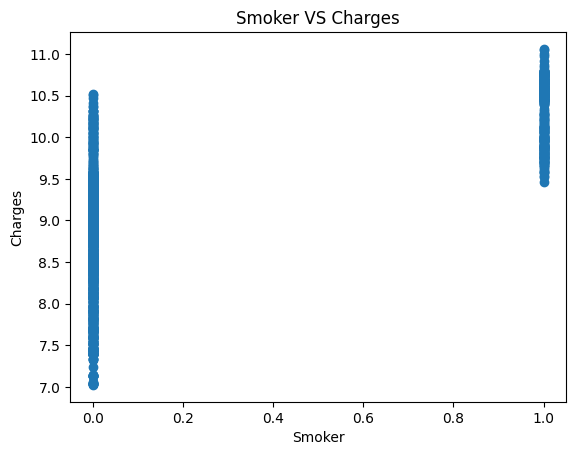

In [30]:
plt.scatter(x = 'smoker', y = 'charges', data = df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker VS Charges')
plt.show()

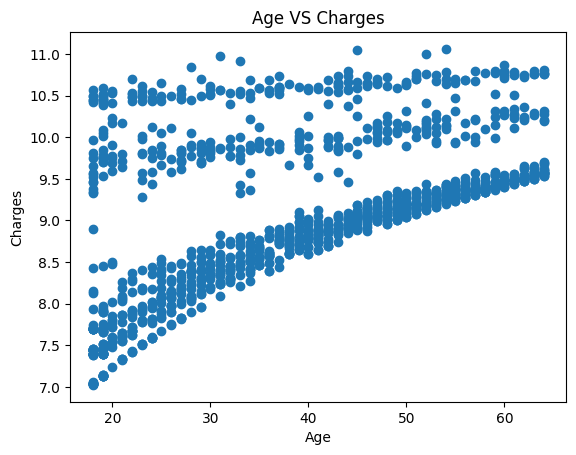

In [31]:
plt.scatter(x = 'age', y = 'charges', data = df)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age VS Charges')
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['charges'],axis = 1)
y = df.charges

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Feature'] = X.columns

vif

,Score,Feature
0,1.017023,age
1,1.008902,sex
2,1.042750,bmi
3,1.002482,children
4,1.006456,smoker
5,1.026484,region


All the values are less than 5 which means less chances of multicollinearity

Let's see the best features

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func = f_classif, k = 6)
fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

features = pd.concat([df_scores,df_columns],axis = 1)
features.columns = ['Score','Feature']
print(features.nlargest(6,'Score'))

   Score   Feature
0    inf       age
1    inf       sex
2    inf       bmi
3    inf  children
4    inf    smoker
5    inf    region


Finding the Best Random state

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [36]:
maxAcc = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

In [37]:
print('Max Accuracy ', maxAcc, ' at random state ', maxRS)

Max Accuracy  0.8226103560634557  at random state  134


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = maxRS)

In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr_test = lr.predict(x_test)
pred_lr_train = lr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lr_test)))


R2 SCORE ON TESTING DATA  0.8226103560634557
R2 SCORE ON TRAINING DATA  0.7420683194940574
MEAN ABSOLUTE ERROR  0.2642822424178557
MEAN SQUARED ERROR  0.15325240497978942
ROOT MEAN SQUARED ERROR  0.5140838865572969


In [40]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
pred_ada_test = ada.predict(x_test)
pred_ada_train = ada.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ada_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ada_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ada_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ada_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ada_test)))


R2 SCORE ON TESTING DATA  0.7541765217404525
R2 SCORE ON TRAINING DATA  0.7056088184938376
MEAN ABSOLUTE ERROR  0.3387559086931882
MEAN SQUARED ERROR  0.21237451300848767
ROOT MEAN SQUARED ERROR  0.5820274123210936


In [41]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb_test = gb.predict(x_test)
pred_gb_train = gb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_gb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_gb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_gb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_gb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_gb_test)))


R2 SCORE ON TESTING DATA  0.9060463312462789
R2 SCORE ON TRAINING DATA  0.8660315424634203
MEAN ABSOLUTE ERROR  0.17047129509289483
MEAN SQUARED ERROR  0.08116948302987134
ROOT MEAN SQUARED ERROR  0.41288169624348187


In [44]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb_test = xgb.predict(x_test)
pred_xgb_train = xgb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_xgb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_xgb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_xgb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_xgb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_xgb_test)))


R2 SCORE ON TESTING DATA  0.8534214178472188
R2 SCORE ON TRAINING DATA  0.9931295110279971
MEAN ABSOLUTE ERROR  0.2122706875098311
MEAN SQUARED ERROR  0.126633774863864
ROOT MEAN SQUARED ERROR  0.46072843141033865


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge

In [46]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr_test = rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_rfr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_rfr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_rfr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_rfr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_rfr_test)))


R2 SCORE ON TESTING DATA  0.8816846189005675
R2 SCORE ON TRAINING DATA  0.9645235479708623
MEAN ABSOLUTE ERROR  0.185551033193001
MEAN SQUARED ERROR  0.1022163205089614
ROOT MEAN SQUARED ERROR  0.4307563501482027


In [47]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_dt_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_dt_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_dt_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_dt_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_dt_test)))


R2 SCORE ON TESTING DATA  0.6747774414337763
R2 SCORE ON TRAINING DATA  0.9967075078726999
MEAN ABSOLUTE ERROR  0.25271234495350653
MEAN SQUARED ERROR  0.2809698365017482
ROOT MEAN SQUARED ERROR  0.5027050277782256


In [48]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn_test = dt.predict(x_test)
pred_knn_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_knn_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_knn_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_knn_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_knn_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_knn_test)))


R2 SCORE ON TESTING DATA  0.6747774414337763
R2 SCORE ON TRAINING DATA  0.9967075078726999
MEAN ABSOLUTE ERROR  0.25271234495350653
MEAN SQUARED ERROR  0.2809698365017482
ROOT MEAN SQUARED ERROR  0.5027050277782256


In [49]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso_test = lasso.predict(x_test)
pred_lasso_train = lasso.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lasso_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lasso_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lasso_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lasso_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lasso_test)))


R2 SCORE ON TESTING DATA  -0.00047574734889010983
R2 SCORE ON TRAINING DATA  0.0
MEAN ABSOLUTE ERROR  0.7431737041108243
MEAN SQUARED ERROR  0.8643419706057754
ROOT MEAN SQUARED ERROR  0.8620752311201293


In [50]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_ridge_test = ridge.predict(x_test)
pred_ridge_train = ridge.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ridge_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ridge_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ridge_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ridge_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ridge_test)))


R2 SCORE ON TESTING DATA  0.8225428908335665
R2 SCORE ON TRAINING DATA  0.7420674224477579
MEAN ABSOLUTE ERROR  0.264428028370093
MEAN SQUARED ERROR  0.1533106902804619
ROOT MEAN SQUARED ERROR  0.5142256589962164


In [51]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr_test = etr.predict(x_test)
pred_etr_train = etr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_etr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_etr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_etr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_etr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_etr_test)))


R2 SCORE ON TESTING DATA  0.8416467056428968
R2 SCORE ON TRAINING DATA  0.9967075078726999
MEAN ABSOLUTE ERROR  0.1899456866820811
MEAN SQUARED ERROR  0.13680631325569217
ROOT MEAN SQUARED ERROR  0.4358275882526037


In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
score = cross_val_score(lr,X_scaled,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lr_test) - score.mean())

[0.79836323 0.68976019 0.83150567 0.76691235 0.7335372 ]
0.7640157274927757
Difference between R2 score and cross validation score is:  0.058594628570679985


In [54]:
score1 = cross_val_score(ada,X_scaled,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ada_test) - score1.mean())

[0.73165497 0.66390184 0.74990624 0.72966926 0.73712274]
0.7224510098365763
Difference between R2 score and cross validation score is:  0.03172551190387618


In [55]:
score2 = cross_val_score(gb,X_scaled,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_gb_test) - score2.mean())

[0.87263428 0.73061719 0.90242825 0.842934   0.80205617]
0.8301339787485984
Difference between R2 score and cross validation score is:  0.07591235249768047


In [56]:
score3 = cross_val_score(xgb,X_scaled,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_xgb_test) - score3.mean())

[0.78064458 0.67071782 0.82567572 0.80556411 0.77294487]
0.7711094202508257
Difference between R2 score and cross validation score is:  0.08231199759639307


In [57]:
score4 = cross_val_score(rfr,X_scaled,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_rfr_test) - score4.mean())

[0.85223662 0.7031649  0.86594016 0.82217428 0.7905185 ]
0.8068068910362263
Difference between R2 score and cross validation score is:  0.07487772786434121


In [58]:
score5 = cross_val_score(dt,X_scaled,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_dt_test) - score5.mean())

[0.7300902  0.58918269 0.62937316 0.71863396 0.69116696]
0.671689394296371
Difference between R2 score and cross validation score is:  0.003088047137405292


In [59]:
score6 = cross_val_score(knn,X_scaled,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_knn_test) - score6.mean())

[0.85116928 0.69407095 0.84606801 0.81120604 0.78751154]
0.7980051639727881
Difference between R2 score and cross validation score is:  -0.12322772253901182


In [60]:
score7 = cross_val_score(lasso,X_scaled,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lasso_test) - score7.mean())

[-1.75945312e-06 -3.16497168e-08 -1.31397410e-03 -1.20439629e-04
 -5.62859334e-04]
-0.00039981283246000033
Difference between R2 score and cross validation score is:  -7.59345164301095e-05


In [61]:
score8 = cross_val_score(ridge,X_scaled,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ridge_test) - score8.mean())

[0.79832323 0.68988478 0.8313592  0.7669471  0.73358101]
0.7640190639600354
Difference between R2 score and cross validation score is:  0.05852382687353108


Difference between R2 score and Cross val score for KNeighborsRegressor is least so KNN is our best fitted model

In [62]:
help(knn)

Help on KNeighborsRegressor in module sklearn.neighbors._regression object:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'algorithm':['kd_tree','brute'],
    'n_neighbors': range(3,9),
    'leaf_size': range(3,30)  
    
}

In [64]:
grid_search = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_grid,cv =5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(3, 30),
                         'n_neighbors': range(3, 9)})

In [65]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=12, n_neighbors=8)

In [67]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 12, 'n_neighbors': 8}

In [68]:
final_model = grid_search.best_estimator_
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred)))

R2 SCORE ON TESTING DATA  0.8851477937946599
MEAN ABSOLUTE ERROR  0.20182258137181816
MEAN SQUARED ERROR  0.09922437650587662
ROOT MEAN SQUARED ERROR  0.4492466820932773


In [69]:
import joblib
joblib.dump(final_model,"Medical Cost Personal Insurance Project.pkl")

['Medical Cost Personal Insurance Project.pkl']

In [70]:
joblib.load("Medical Cost Personal Insurance Project.pkl")

KNeighborsRegressor(algorithm='kd_tree', leaf_size=12, n_neighbors=8)

In [71]:
loaded_model = joblib.load("Medical Cost Personal Insurance Project.pkl")
loaded_model.score(x_test,y_test)

0.8851477937946599